<a href="https://colab.research.google.com/github/tanglan7857/-/blob/master/3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))   
    for i, sequence in enumerate(sequences): 
        results[i, sequence] = 1.
    return results 
  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)  
x_train[0]  

In [0]:
x_val = x_train[:10000]
partion_x_train = x_train[10000:]
y_val = y_train[:10000]
partion_y_train = y_train[10000:]


In [18]:
from keras import losses 
from keras import metrics  

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc']) 
history = model.fit(partion_x_train,partion_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))


Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 287us/step - loss: 0.5048 - acc: 0.7871 - val_loss: 0.3775 - val_acc: 0.8704
Epoch 2/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.2991 - acc: 0.9047 - val_loss: 0.3001 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.2173 - acc: 0.9284 - val_loss: 0.3079 - val_acc: 0.8716
Epoch 4/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.1747 - acc: 0.9437 - val_loss: 0.2825 - val_acc: 0.8845
Epoch 5/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.1422 - acc: 0.9541 - val_loss: 0.2855 - val_acc: 0.8857
Epoch 6/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.1147 - acc: 0.9651 - val_loss: 0.3142 - val_acc: 0.8778
Epoch 7/20
15000/15000 [==============================] - 3s 169us/step - 

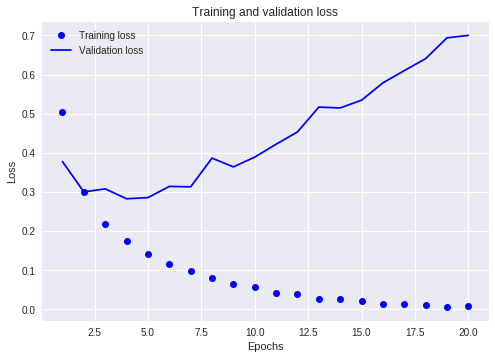

In [19]:
import matplotlib.pyplot as plt 
history_dict = history.history 
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']  
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()  
plt.show()

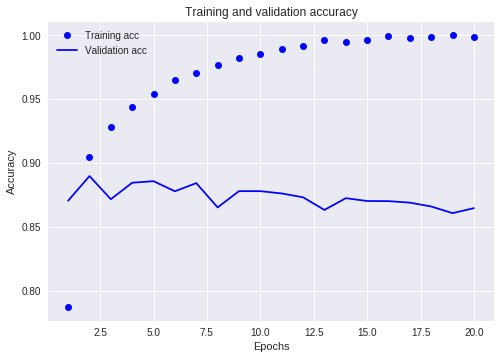

In [21]:
plt.clf()    
acc = history_dict['acc']  
val_acc = history_dict['val_acc']  
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend()  
plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc']) 
model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)



Epoch 1/4
25000/25000 [==============================] - 4s 146us/step - loss: 0.4738 - acc: 0.8224
Epoch 2/4
25000/25000 [==============================] - 3s 121us/step - loss: 0.2674 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 3s 121us/step - loss: 0.2032 - acc: 0.9281
Epoch 4/4
25000/25000 [==============================] - 2s 90us/step


In [23]:
results

[0.3117345802497864, 0.87596]

In [24]:
 model.predict(x_test) 

array([[0.16178018],
       [0.99985385],
       [0.40019736],
       ...,
       [0.08254781],
       [0.04924133],
       [0.4586171 ]], dtype=float32)